In [1]:
from google.colab import files
files.upload()

Saving cat.jpg to cat.jpg


{'cat.jpg': b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x00\x00\x01\x00\x01\x00\x00\xff\xdb\x00C\x00\x06\x04\x05\x06\x05\x04\x06\x06\x05\x06\x07\x07\x06\x08\n\x10\n\n\t\t\n\x14\x0e\x0f\x0c\x10\x17\x14\x18\x18\x17\x14\x16\x16\x1a\x1d%\x1f\x1a\x1b#\x1c\x16\x16 , #&\')*)\x19\x1f-0-(0%()(\xff\xdb\x00C\x01\x07\x07\x07\n\x08\n\x13\n\n\x13(\x1a\x16\x1a((((((((((((((((((((((((((((((((((((((((((((((((((\xff\xc2\x00\x11\x08\x05@\x06@\x03\x01"\x00\x02\x11\x01\x03\x11\x01\xff\xc4\x00\x1b\x00\x00\x02\x03\x01\x01\x01\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x02\x03\x00\x01\x04\x05\x06\x07\xff\xc4\x00\x19\x01\x01\x01\x01\x01\x01\x01\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x01\x02\x03\x04\x05\xff\xda\x00\x0c\x03\x01\x00\x02\x10\x03\x10\x00\x00\x01\xf4BA\xdb\xa1h\xcf\xa4{\x04\xe6h\rv!m\x05\x03\x12\x90\xaa\xeb9Z^\x9c\xcc\xabj\xf3h\xc5\x81\x98\x1e\xf4R\x8bV\xd8\x05\xa1\xc1\x15\x8a%\xca4C\x15.\x15.\x10\x86\xc2\x92\xc9u*\t\x0c\r\x12\xf3e]KBCU%\xd0\xc3\xba]\xb2X\xb8\xca\xa0\xb2\xb8\xab+\xccX\xb0T\x0e\x98\

In [5]:
import matplotlib.pyplot as plt

In [2]:
import cv2
import numpy as np
import tensorflow as tf

IMAGE_PATH = 'cat.jpg'
LAYER_NAME = 'block5_conv3'
CAT_CLASS_INDEX = 281

img = tf.keras.preprocessing.image.load_img(IMAGE_PATH, target_size=(224, 224))
img = tf.keras.preprocessing.image.img_to_array(img)

model = tf.keras.applications.vgg16.VGG16(weights='imagenet', include_top=True)

grad_model = tf.keras.models.Model([model.inputs], [model.get_layer(LAYER_NAME).output, model.output])

with tf.GradientTape() as tape:
    conv_outputs, predictions = grad_model(np.array([img]))
    loss = predictions[:, CAT_CLASS_INDEX]

output = conv_outputs[0]
grads = tape.gradient(loss, conv_outputs)[0]

weights = tf.reduce_mean(grads, axis=(0, 1))

cam = np.ones(output.shape[0:2], dtype=np.float32)

for index, w in enumerate(weights):
    cam += w * output[:, :, index]

cam = cv2.resize(cam.numpy(), (224, 224))
cam = np.maximum(cam, 0)
heatmap = (cam - cam.min()) / (cam.max() - cam.min())

cam = cv2.applyColorMap(np.uint8(255*heatmap), cv2.COLORMAP_JET)

output_image = cv2.addWeighted(cv2.cvtColor(img.astype('uint8'), cv2.COLOR_RGB2BGR), 0.5, cam, 1, 0)

553467904/553467096 [==============================] - 4s 0us/step


In [3]:
meow = cv2.imread('cat.jpg')
meow = cv2.resize(meow, (224,224))
meow.shape, output_image.shape

((224, 224, 3), (224, 224, 3))

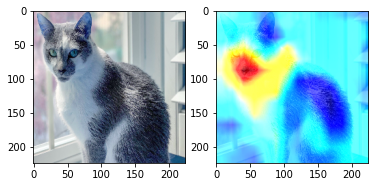

In [6]:
fig, (ax1, ax2) = plt.subplots(1, 2)
ax1.imshow(meow)
ax2.imshow(output_image)